In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot  as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = sns.load_dataset("penguins")
df_copy = df.copy()

In [3]:
print(len(df_copy))
df_copy.isnull().sum()

344


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
df_copy.dropna(inplace=True)

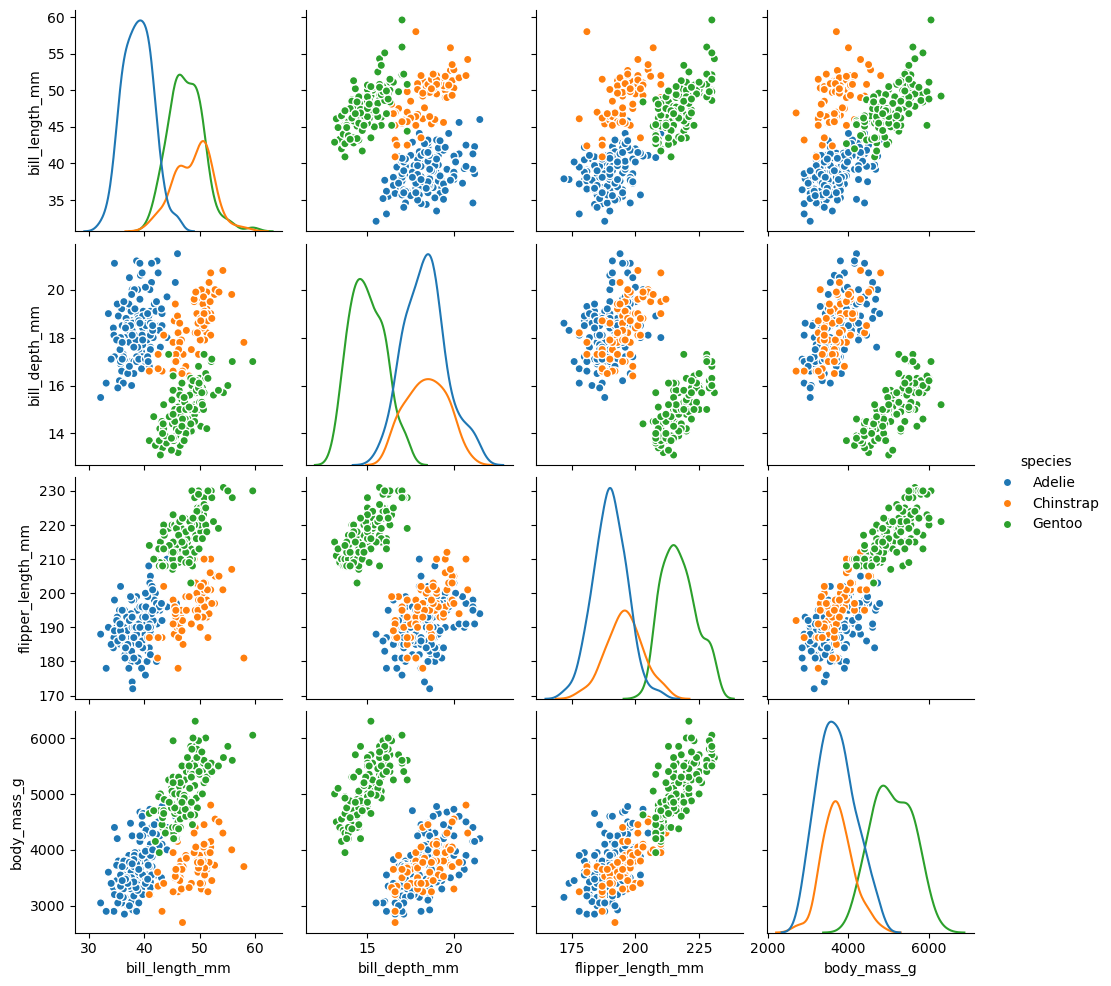

In [5]:
sns.pairplot(
    df_copy,
    plot_kws=dict(marker="o", linewidth=1),
    diag_kws=dict(fill=False),
    hue='species'
)

In [6]:
X = pd.get_dummies(df_copy.drop('species', axis=1), drop_first=True)
y = df_copy['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

base_preds = model.predict(X_test)

print(classification_report(y_test, base_preds))
print(confusion_matrix(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100

[[39  1  0]
 [ 3 24  0]
 [ 1  0 32]]


[Text(0.5416666666666666, 0.9, 'flipper_length_mm <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'bill_length_mm <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'bill_length_mm <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'bill_depth_mm <= 17.45\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'island_Dream <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'bill_depth_mm <= 17.65\ngini = 0.045\nsamples 

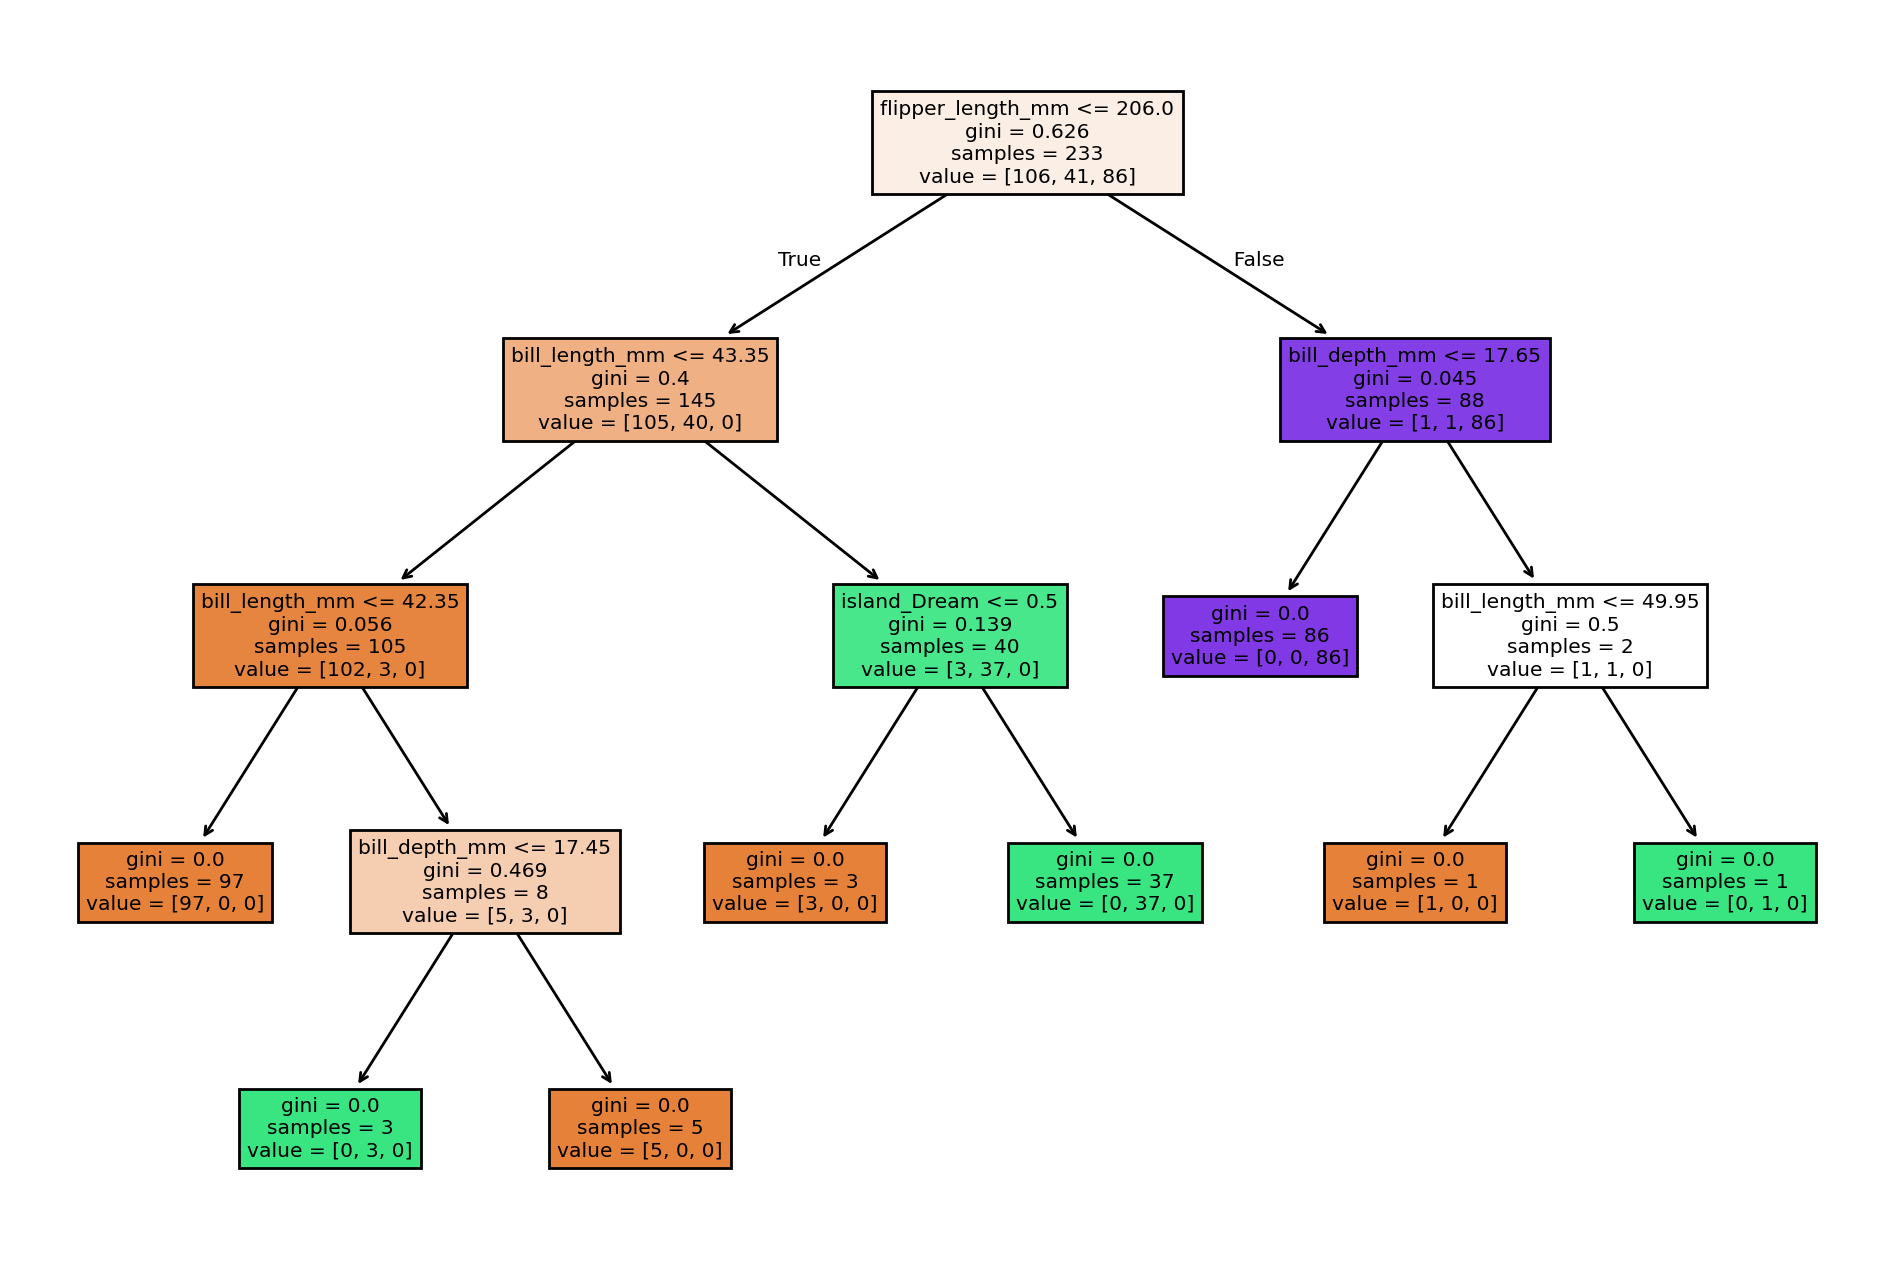

In [8]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns.tolist(), filled=True)

In [9]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
flipper_length_mm,0.575758
bill_length_mm,0.340359
bill_depth_mm,0.045822
island_Dream,0.038061
body_mass_g,0.000000
island_Torgersen,0.000000
sex_Male,0.000000


In [10]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')

    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns.tolist(), filled=True)

In [11]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





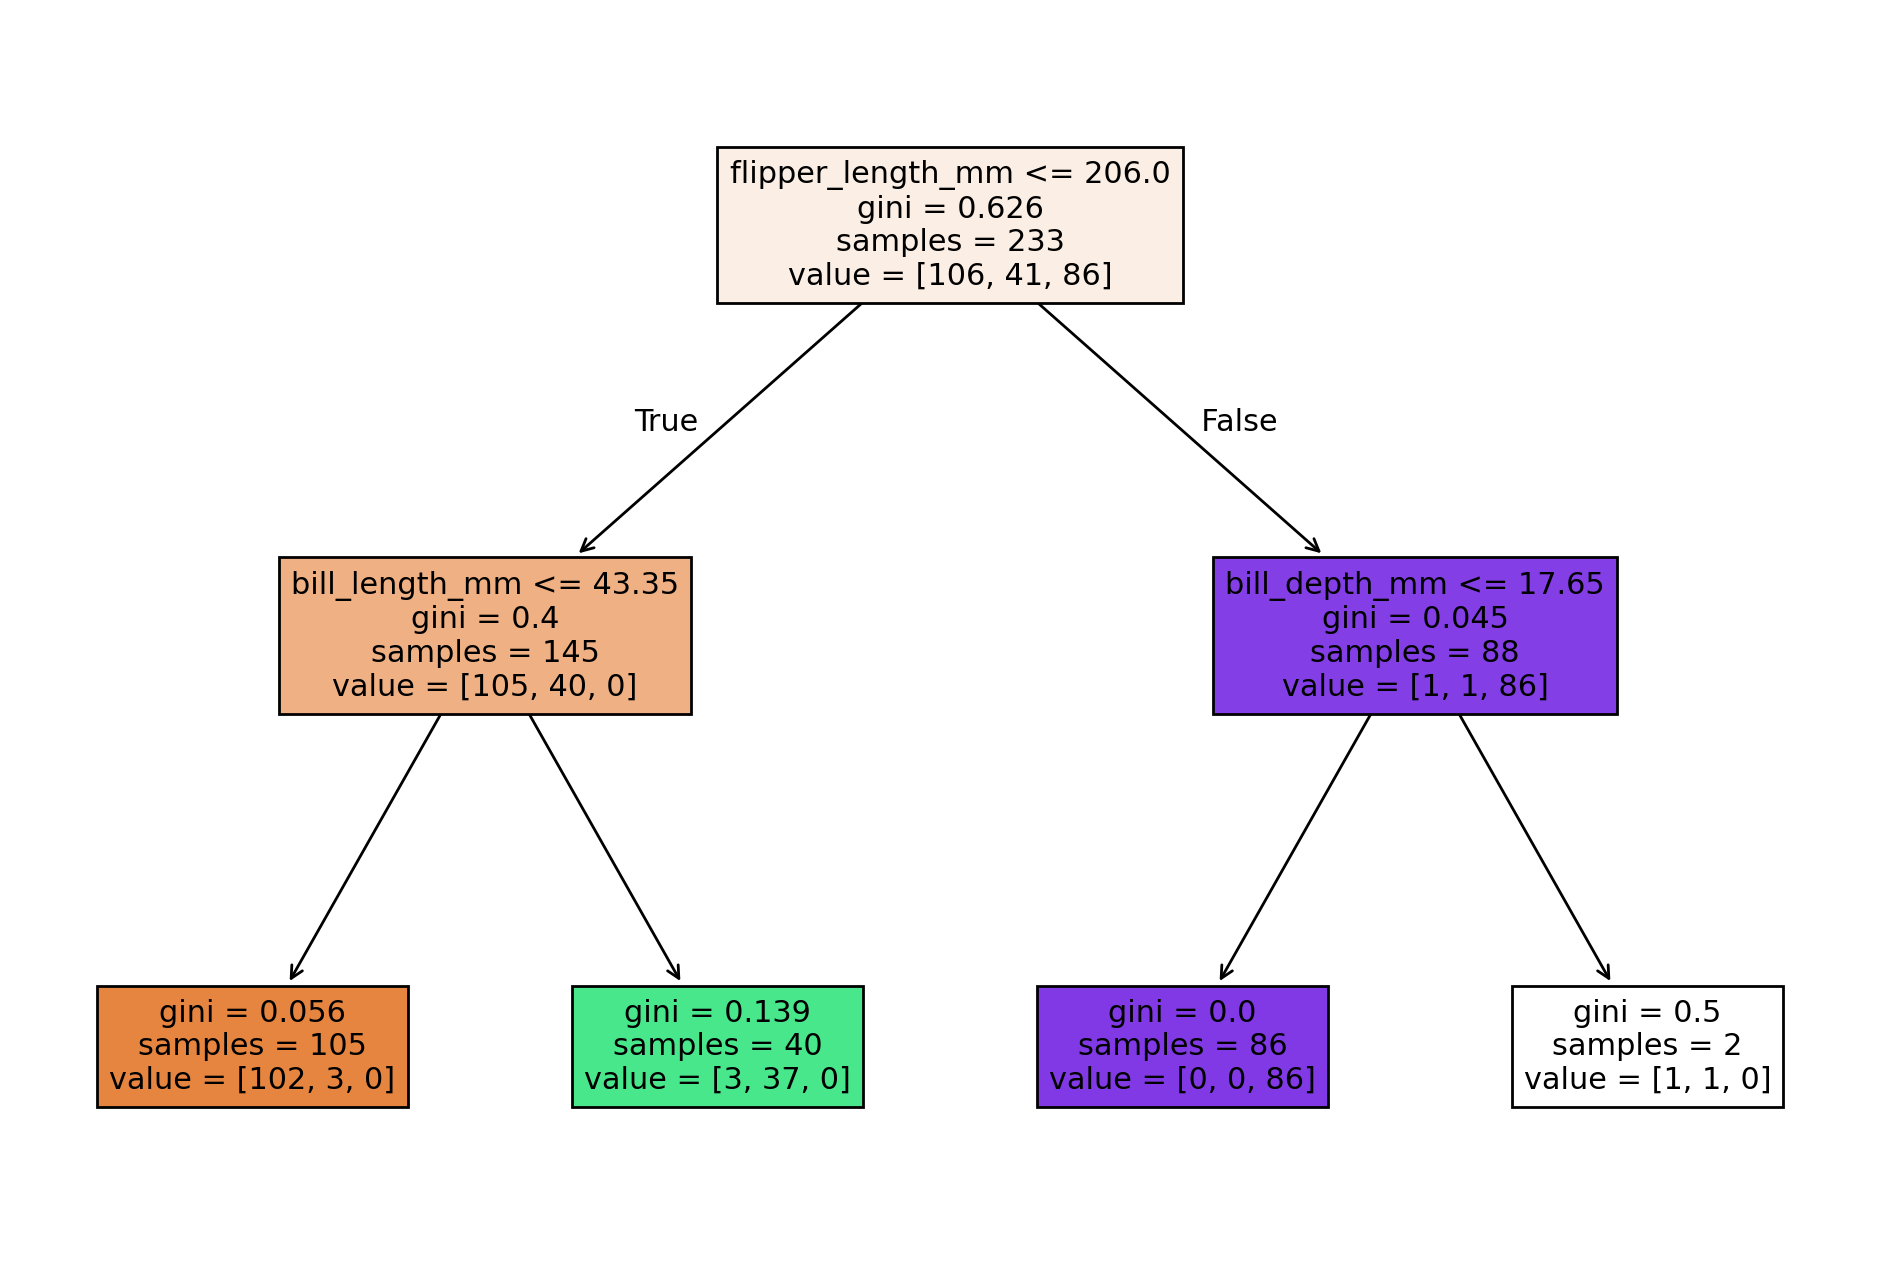

In [12]:
report_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





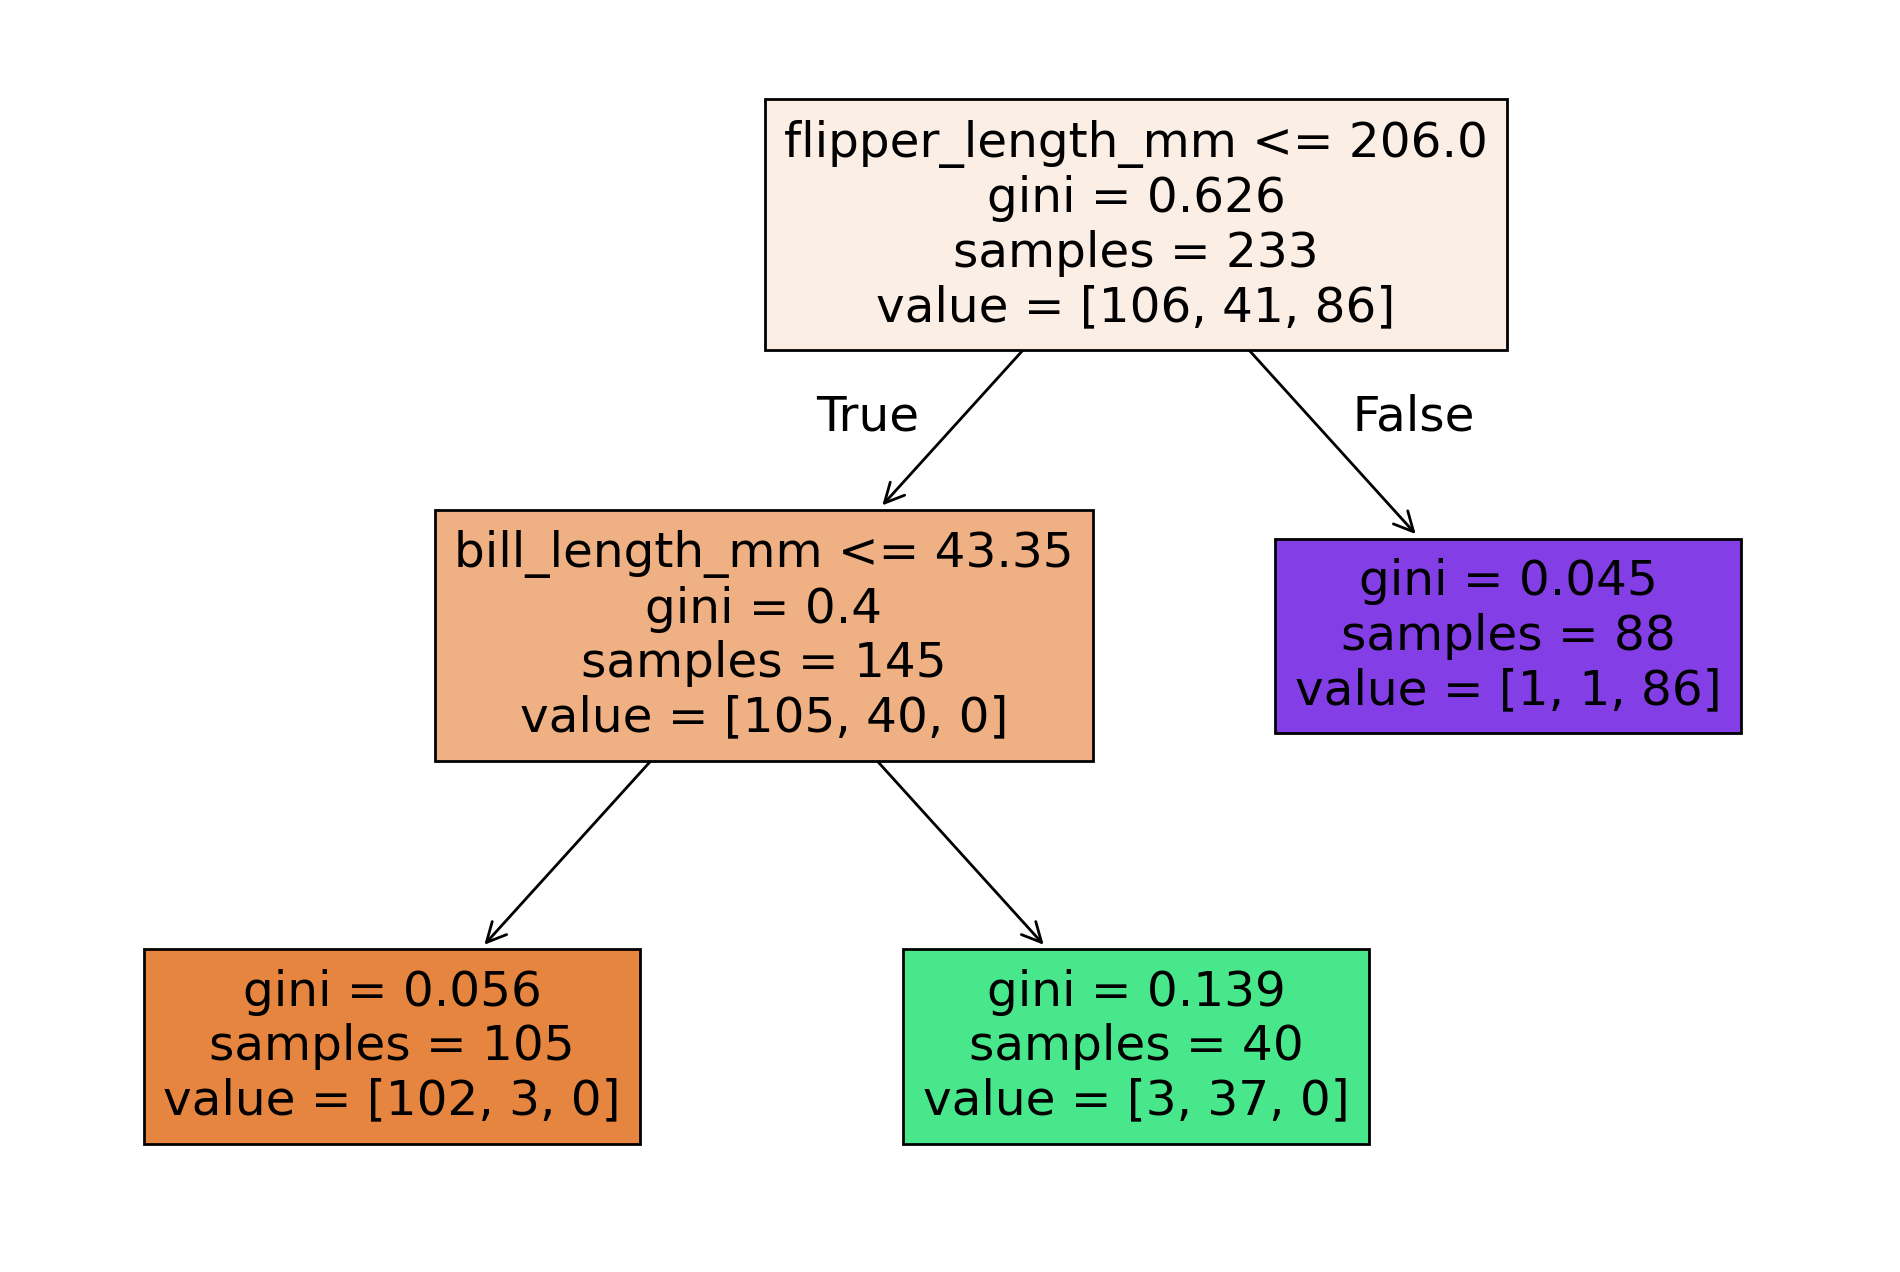

In [13]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_tree.fit(X_train, y_train)

report_model(max_leaf_tree)

In [14]:
# End of slide 56

In [15]:
# Slide 57: Random Forest - Introduction. 09/03

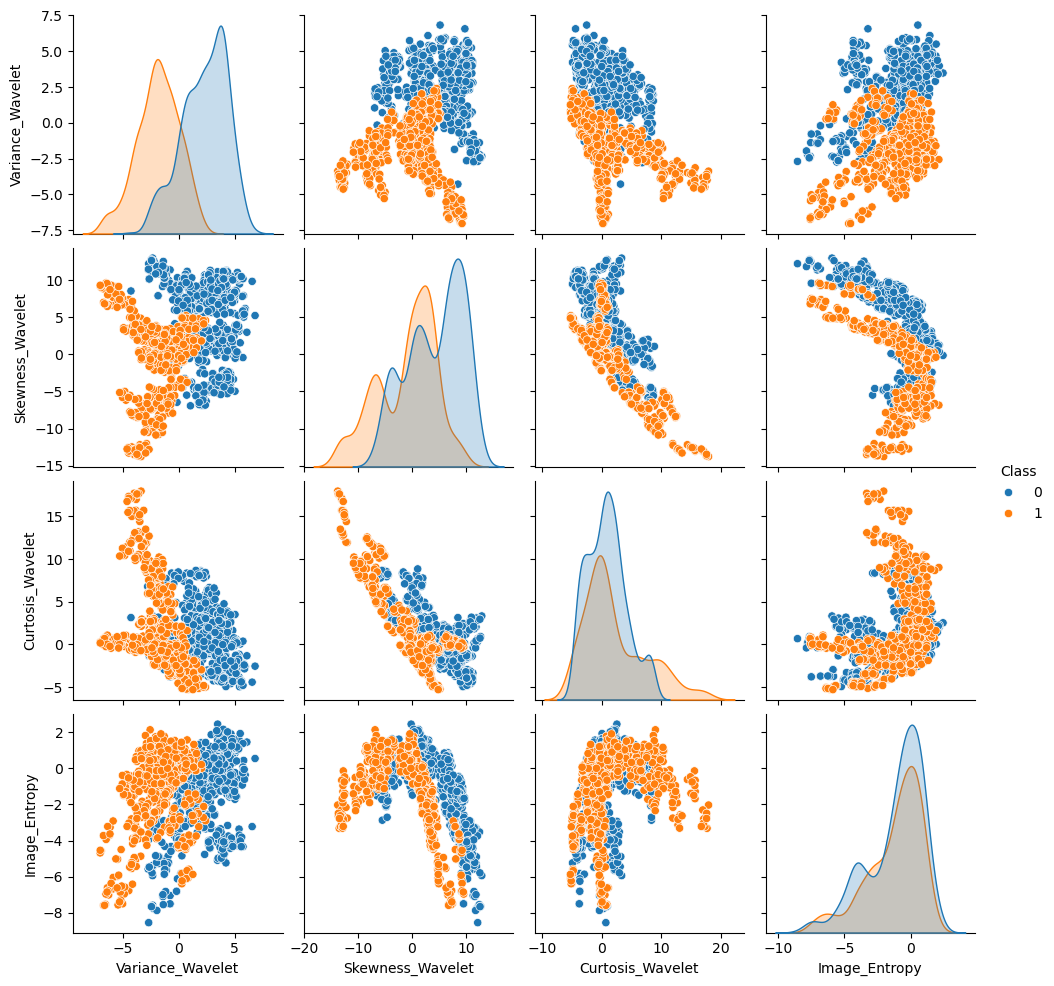

In [16]:
df = pd.read_csv('csvs/data_banknote_authentication.csv')
df_copy = df.copy()
# df.head()
sns.pairplot(df_copy, hue='Class')
plt.show()

In [17]:
# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Define hyperparameter options for Grid Search
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

# Define the hyperparameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

# Initialize Random Forest Classifier
rfc = RandomForestClassifier()

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(rfc, param_grid)

In [ ]:
grid.fit(X_train, y_train)

In [19]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [20]:
rfc = RandomForestClassifier(n_estimators=100, max_features=2, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [21]:
rfc.oob_score_

0.9948542024013722

In [22]:
prediction = rfc.predict(X_test)

print(classification_report(prediction, y_test))
print(confusion_matrix(prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.98      0.99        84

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206

[[122   0]
 [  2  82]]


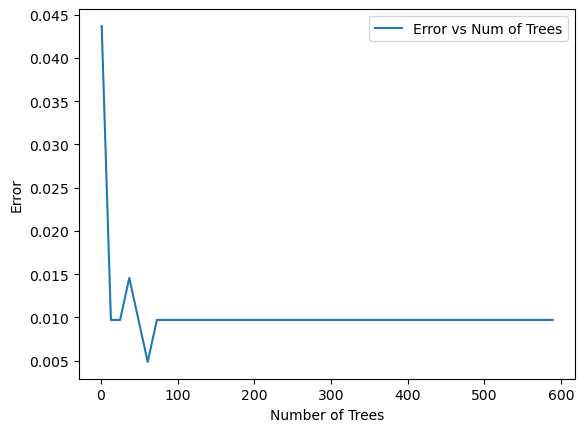

In [25]:
accuracy = []

for estimator in range(1, 600, 12):
    rfc = RandomForestClassifier(n_estimators=estimator, max_features=2)
    rfc.fit(X_train, y_train)

    prediction = rfc.predict(X_test)

    score = accuracy_score(y_test, prediction)

    accuracy.append(1-score)

plt.plot(range(1, 600, 12), accuracy, label='Error vs Num of Trees')


plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

In [24]:
# End of slide 57 - 11/03/25